In [1]:
"""
这节一共尝试了3中实现方式。这个notebook是第一种：
1. 使用gensim的Word2Vec训练词向量
2. 使用jieba进行中文分词
3. 使用gensim的Word2Vec训练词向量
"""
with open('../three_body_utf8.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()

In [2]:
import jieba  # 使用jieba进行中文分词

sentences = [list(jieba.cut(line.strip())) for line in lines]

sentences[:100]

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/bf/c75nmms17cd1lgb7wtxd__yw0000gp/T/jieba.cache
Loading model cost 0.320 seconds.
Prefix dict has been built successfully.


[['《', '三体', '》'],
 ['作者', '：', '刘慈欣'],
 [],
 ['内容简介'],
 ['《', '三体', '1', '》'],
 ['文化大革命',
  '如火如荼',
  '进行',
  '的',
  '同时',
  '。',
  '军方',
  '探寻',
  '外星',
  '文明',
  '的',
  '绝秘',
  '计划',
  '“',
  '红岸',
  '工程',
  '”',
  '取得',
  '了',
  '突破性',
  '进展',
  '。',
  '但',
  '在',
  '按',
  '下',
  '发射',
  '键',
  '的',
  '那一刻',
  '，',
  '历经',
  '劫难',
  '的',
  '叶文洁',
  '没有',
  '意识',
  '到',
  '，',
  '她',
  '彻底改变',
  '了',
  '人类',
  '的',
  '命运',
  '。',
  '地球',
  '文明',
  '向',
  '宇宙',
  '发出',
  '的',
  '第一声',
  '啼鸣',
  '，',
  '以',
  '太阳',
  '为',
  '中心',
  '，',
  '以',
  '光速',
  '向',
  '宇宙',
  '深处',
  '飞驰',
  '…',
  '…'],
 ['四',
  '光年',
  '外',
  '，',
  '“',
  '三体',
  '文明',
  '”',
  '正',
  '苦苦',
  '挣扎',
  '―',
  '―',
  '三颗',
  '无规则',
  '运行',
  '的',
  '太阳',
  '主导',
  '下',
  '的',
  '百余次',
  '毁灭',
  '与',
  '重生',
  '逼迫',
  '他们',
  '逃离',
  '母星',
  '。',
  '而',
  '恰在此时',
  '。',
  '他们',
  '接收',
  '到',
  '了',
  '地球',
  '发来',
  '的',
  '信息',
  '。',
  '在',
  '运用',
  '超',
  '技术',
  '锁死',
  '地球',
  '人',
  '的',
  '基础科学',
  '之

In [3]:
len(sentences)

12059

In [4]:
from gensim.models import Word2Vec # FastText nn.Embedding(dim=100, vocab_size=10000)

model = Word2Vec(
    sentences, 
    vector_size=100,
    window=15, 
    min_count=3, 
    workers=4,
    sg=2, # 1 skip-gram, 2 for CBOW
    epochs=10,
    seed=42,
    negative=5, # for negative sampling
    ns_exponent=0.75, # for negative sampling
    alpha=0.03, # learning rate
    min_alpha=0.0007, # learning rate decay
    hs=0, # 1 hierarchical softmax, 0 for negative sampling
    sample=6e-5, # for negative sampling
    cbow_mean=1, # 1 for mean of context word vectors, 0 for sum
    compute_loss=True, # compute loss
    max_final_vocab=None, # maximum size of vocab
    sorted_vocab=1, # sort vocab by frequency
    batch_words=10000, # batch size
)

model.save('word2vec.model')



In [5]:
model.wv['三体']

array([-0.01005026,  0.30910555, -0.2656082 , -0.66576016,  0.48096505,
       -0.1312062 , -0.01487281,  0.48341858, -0.00722726, -0.21901505,
       -0.33433235,  0.30145243,  0.18694016, -0.36419302,  0.14130601,
       -0.03100538,  0.3873516 , -0.602389  , -0.1924606 ,  0.05015148,
       -0.11825603,  0.4175472 ,  0.32425624,  0.26502612, -0.2840918 ,
        0.1562382 ,  0.1637357 ,  0.5662394 , -0.15599953,  0.17385186,
       -0.10980096,  0.05760115, -0.18172984, -0.09996959, -0.03710439,
        0.08128066,  0.2648913 , -0.07844504, -0.11737821, -0.00550612,
        0.5235134 ,  0.11344954, -0.10935875, -0.3451992 ,  0.2784965 ,
       -0.34185246,  0.33431694, -0.15516338, -0.15150209, -0.544079  ,
        0.16867137, -0.05011567, -0.42445436, -0.5393865 ,  0.06266749,
        0.02768878, -0.07956065,  0.26326165, -0.17467396,  0.07501356,
       -0.26841745,  0.08519871,  0.2793504 , -0.35834575, -0.20649442,
        0.2029403 ,  0.1816349 , -0.2654105 , -0.4546928 ,  0.17

In [6]:
# model.wv.most_similar(['汪淼'])
model.wv.most_similar(['智子'])

[('盲区', 0.6417055726051331),
 ('带回', 0.6128886938095093),
 ('无处不在', 0.6108973026275635),
 ('缩回', 0.6074584722518921),
 ('依然', 0.6017594933509827),
 ('十一', 0.592728316783905),
 ('对抗', 0.5892564058303833),
 ('信道', 0.5858031511306763),
 ('低维', 0.5830298662185669),
 ('追赶', 0.582973062992096)]

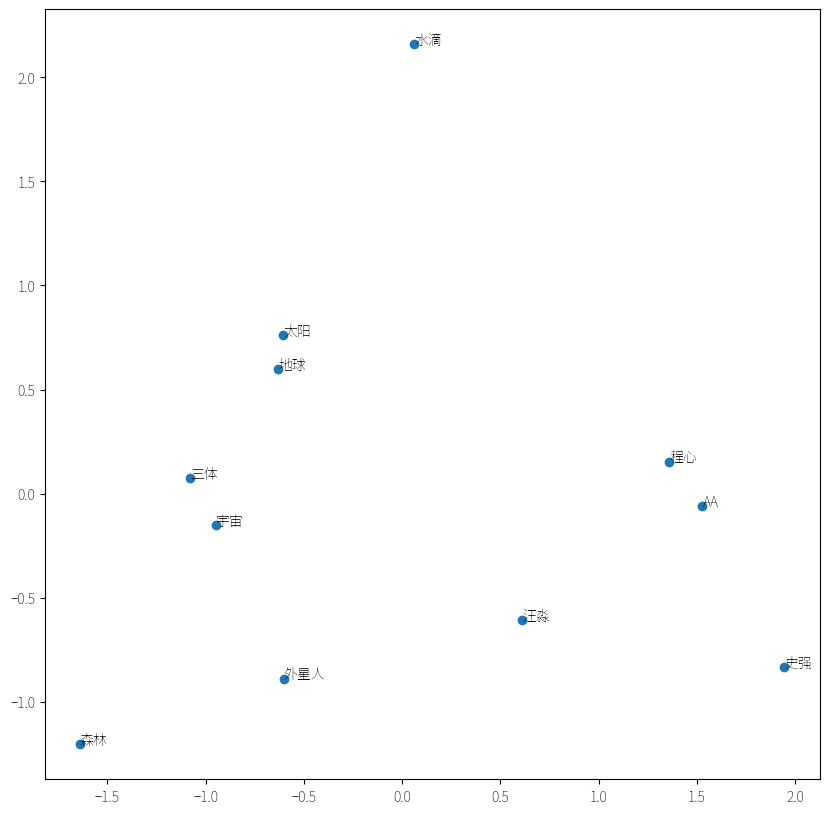

In [8]:
# plot word vector
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager, FontProperties
# import custom font
font_path = './NotoSansSC-VariableFont_wght.ttf'
font_prop = FontProperties(fname=font_path)
fontManager.addfont(font_path)
plt.rcParams['font.family'] = font_prop.get_name()


def plot_words(model, words):
    word_vectors = [model.wv[word] for word in words]
    pca = PCA(n_components=2)
    word_vec_2d = pca.fit_transform(word_vectors)
    plt.figure(figsize=(10, 10))
    plt.scatter(word_vec_2d[:, 0], word_vec_2d[:, 1])
    for i, word in enumerate(words):
        plt.text(word_vec_2d[i, 0], word_vec_2d[i, 1], word)
    plt.show()
    
plot_words(model, ['三体', '地球', '太阳', '宇宙', '森林', '水滴', '史强', '汪淼', 'AA', '程心', '外星人'])


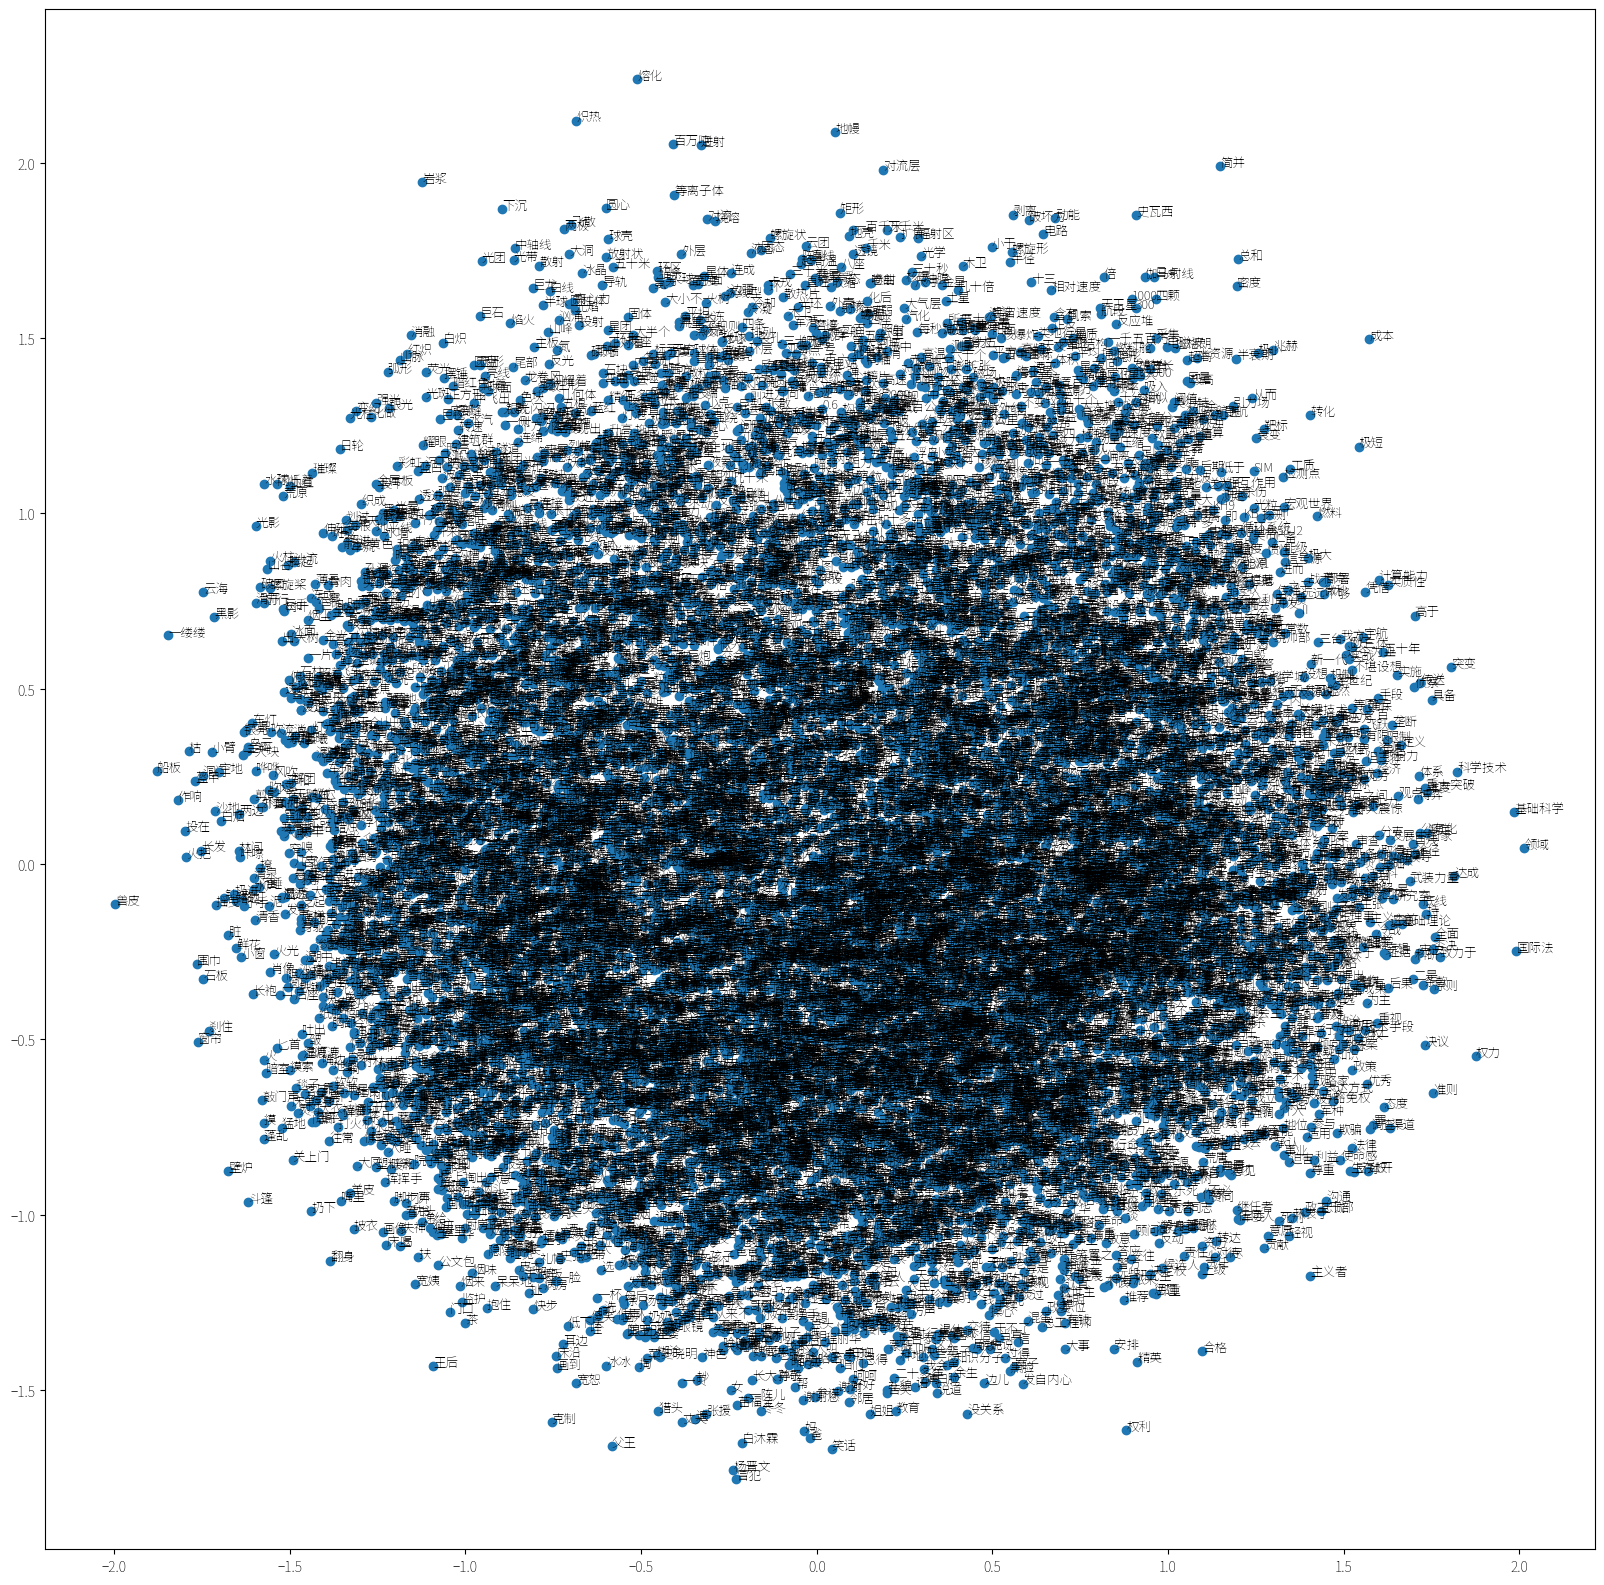

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Extract all unique words from the model's vocabulary
words = list(model.wv.index_to_key)

# Get vectors for each word
word_vectors = [model.wv[word] for word in words]

# Apply PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
word_vec_2d = pca.fit_transform(word_vectors)

# Plot the 2D vectors
plt.figure(figsize=(20, 20))
plt.scatter(word_vec_2d[:, 0], word_vec_2d[:, 1])

# Label each point with its corresponding word
for i, word in enumerate(words):
    plt.text(word_vec_2d[i, 0], word_vec_2d[i, 1], word, fontsize=9)

plt.show()

In [10]:
# count the vocabulary
len(model.wv.index_to_key)

12048

In [11]:
# save the word vector to txt file
model.wv.save_word2vec_format('word_vector.txt', binary=False)

In [12]:
# calculate cosine similarities
text1 = '三体'
text2 = '地球'
text3 = '程心' # name
model.wv.similarity(text1, text2)

0.63797724

In [13]:
# calculate euclidean distance
model.wv.distance(text1, text2)

0.3620227575302124

In [14]:
# calculate cosine similarities
model.wv.similarity(text1, text3)

0.12699452

In [15]:
model.wv.distance(text1, text3)

0.8730054795742035

In [16]:
# convert multiple words to vectors
words1 = ['三体', '人', '舰队', '入侵', '地球']
words2 = ['程心', '和', '史强', '同时', '冬眠', '等待', '外星人', '的', '到来']
words3 = ['事实上', '二维', '城市', '石头']
vectors1 = [model.wv[word] for word in words if word in model.wv]
vectors2 = [model.wv[word] for word in words2 if word in model.wv]
vectors3 = [model.wv[word] for word in words3 if word in model.wv]
# mean pooling
import numpy as np
mean_vector1 = np.mean(vectors1, axis=0)
mean_vector2 = np.mean(vectors2, axis=0)
mean_vector3 = np.mean(vectors3, axis=0)

# calculate cosine similarity of mean_vector1 and mean_vector2
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity([mean_vector1], [mean_vector2]))
print(cosine_similarity([mean_vector2], [mean_vector3]))

[[0.84492475]]
[[0.60576844]]
